# **Final Project: Analysis of House Prices for California (Early 2000s)**
---

### **Description**
In this final project, I will apply what I have learned over the years and analyze a dataset containing information on the price of houses and other factors influencing the cost of homes. I will be performing exploratory data analysis, cleaning and wrangling the data, and creating detailed visualizations. I will then train machine learning models to predict the future cost of homes based on a number of relevant features.


<br>

###**About the Dataset**

Below is a list of variables in this dataset and what they represent.


About this file



* `Longitude`: A measure of how far west a house is; a higher value is farther west
* `Latitude`: A measure of how far north a house is; a higher value is farther north
* `HousingMedianAge`: Median age of a house within a block; a lower number is a newer building
* `TotalRooms`: Total number of rooms within a block
* `TotalBedrooms`: Total number of bedrooms within a block
* `Population`: Total number of people residing within a block
* `Households`: Total number of households, a group of people residing within a home unit, for a block
* `MedianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* `MedianHouseValue`: Median house value for households within a block (measured in US Dollars)
* `OceanProximity`: Location of the house w.r.t ocean/sea

<br>




### **Final Project Structure**
**Part 1**:  [Data Exploration, Wrangling, and Visualization](#p1)

**Part 2**:  [Predicting house value](#p2)

> **Part 2.1**:  [Using All Numerical Features and Label Encodings](#p2.1)

> **Part 2.2**:  [Using All Numerical Features and Dummy Variable Encodings](#p2.2)

> **Part 2.3**:  [Using the 4 Best Numerical Features and the Best Encodings Where Relevant](#p2.3)

> **Part 2**:  [Wrapup](#p2w)


</br>

### **Cheat Sheets (If you need them)**

* [pandas Commands](https://docs.google.com/document/d/1KWwBKnL0bFj7dmanDKOpOJuCykqWEbvIbulzCTyZ7aE/edit?usp=sharing)

* [Feature Engineering and Selection with pandas](https://docs.google.com/document/d/191CH-X6zf4lESuThrdIGH6ovzpHK6nb9NRlqSIl30Ig/edit?usp=sharing)

* [Scaling, Encoding, and K-Folds with sklearn](https://docs.google.com/document/d/1Ox3UCOVcSh4MoY7mvxoPc4zW1TQj0xlb8smd2MPTiOM/edit?usp=sharing)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1qkNP54isNQqWbjyiBFjAdbcRjCwOjLOxcZujDF3ixcI/edit?usp=sharing)

* [Linear Regression with sklearn](https://docs.google.com/document/d/1sPaXYGzMp99QgmVYvPk_1Qpq5KEMXuazEe062OIGDeY/edit?usp=sharing)

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1J3m7EOf9qO5RkUKmLqhF5kP6UNM0MR6RPrHW7TsCzKY/edit?usp=sharing)

* [Logistic Regression with sklearn](https://docs.google.com/document/d/1SVab1sseooIm7qfUif_g680xynTxx5nL0Ledh2w9FI4/edit?usp=sharing)


<br>

**Before starting, please run the code below to import all necessary functions, libraries, and data.**

In [164]:
!pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# This is the dataset I will be using for this project
home_df = pd.read_csv("https://raw.githubusercontent.com/MichaelSarancik/CSDA490_FInal_Project_MichaelSarancik/main/housing.csv")

<a name="p1"></a>


## **Part 1: Data Preparation**
---
In this section, I will conduct data exploration, wrangling, and visualization.


### **Step #1**
---

Getting Familiar with the data.

In [165]:
print("The number of rows in this dataset:", len(home_df))
print("The number of columns in this dataset:", len(home_df.columns))
print("\n")
#This will only print the first 10 rows of the dataset
home_df.head(10)

The number of rows in this dataset: 20640
The number of columns in this dataset: 10




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### **Step #2**
---
Cleaning the dataset.



In [166]:
#using a list to store the columns as variables for easy access
columns = list(home_df.columns)
print(columns)
print("\n**************************************")


# finding missing values / nulls (if there are any)
print("Missing values distribution: ")
print(home_df.isnull().mean())

# find the data types of the columns
print("\n**************************************")
print(home_df.dtypes)

# if data set has columns with string data types then check and remove trailing whitespaces
# below is one way you could do it

# getting all the columns with string/mixed type values
#str_cols = list(home_df.columns)
#str_cols.remove('name of column')

# removing leading and trailing characters from columns with str type
#for row in str_cols:
#    home_df[row] = home_df[row].str.strip()

# looping through the columns to fill the entries with NaN values with ""
for row in columns:
  home_df[row] = home_df[row].fillna(0)

print("\n**************************************")

# checking for the number of unique entries in each column
for column in range(len(columns)):
  print("Number of unique values in column", columns[column],'>>', len(home_df[columns[column]].unique()))

# Just used this to manually check the values in each column to see if there is anything out of the ordinary
# home_df[columns['type in the column number you wish to see here']].unique()

print("\n**************************************")


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

**************************************
Missing values distribution: 
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

**************************************
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

**************************************
Number of unique values in column longitude 

### **Step #3**
---
Determine the mean and standard deviation of the numerical variables to get a better understanding of the data.



In [167]:
# Used to describe the data such as determining the mean, sd, min, max, etc...
home_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Step #4**
---
Encoding all categorical variables (if any) and Dropping any redundant features (if any).

In [168]:
#function that creates a dictionary of countries
def init_dict_ocean_proximity(n):
    ''' Initialize a dictionary with n key-value pairs. '''
    return {home_df['ocean_proximity'].unique()[proximity]: proximity for proximity in range(n)}

#just to check if my function works and returns what I want it to
print(init_dict_ocean_proximity(len(home_df['ocean_proximity'].unique())), '\n')

#Encoded the ocean proximity so that I could work with the results
home_df['ocean_proximity_encoded'] = home_df['ocean_proximity'].map(init_dict_ocean_proximity(len(home_df['ocean_proximity'].unique())))

home_df.loc[home_df['median_income'].between(0, 2), 'median_income_level'] = '1'
home_df.loc[home_df['median_income'].between(2.000001, 5), 'median_income_level'] = '2'
home_df.loc[home_df['median_income'].between(5.000001, 10), 'median_income_level'] = '3'
home_df.loc[home_df['median_income'].between(10.000001, 14), 'median_income_level'] = '4'
home_df.loc[home_df['median_income'].between(14.00001, 16), 'median_income_level'] = '5'


#This is how you would remove redundant features
#home_df = home_df.drop(['name of column'], axis=1)

# Just to make sure the created encoded column is in the list of columns for the home dataframe
home_df.columns

# Just to make sure every row has a median income level
print("Number of rows for median income level:", len(home_df['median_income_level']))
# Just to make sure the created encoded column is in the list of columns for the home dataframe
print(home_df['median_income_level'].value_counts(),'\n')
home_df.head(10)


{'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4} 

Number of rows for median income level: 20640
median_income_level
2    13694
3     4181
1     2457
4      251
5       57
Name: count, dtype: int64 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded,median_income_level
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,2
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,0,2
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,0,2
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,0,2
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0,2
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,0,2


### **Step #5**
---

Created separate scatterplots for each of the following relationships:

1. `Population` and `Households`.
2. `Population` and `Median Income`.
3. `Population` and `Median Income` where location = `<1H OCEAN`.
4. `Population` and `Median Income` where location = `NEAR BAY`.
5. `Population` and `Median Income` where location = `INLAND`.
6. `Population` and `Median Income` where location = `NEAR OCEAN`.
7. `Population` and `Median Income` where location = `ISLAND`.

#### **1. `Population` and `Households`.**

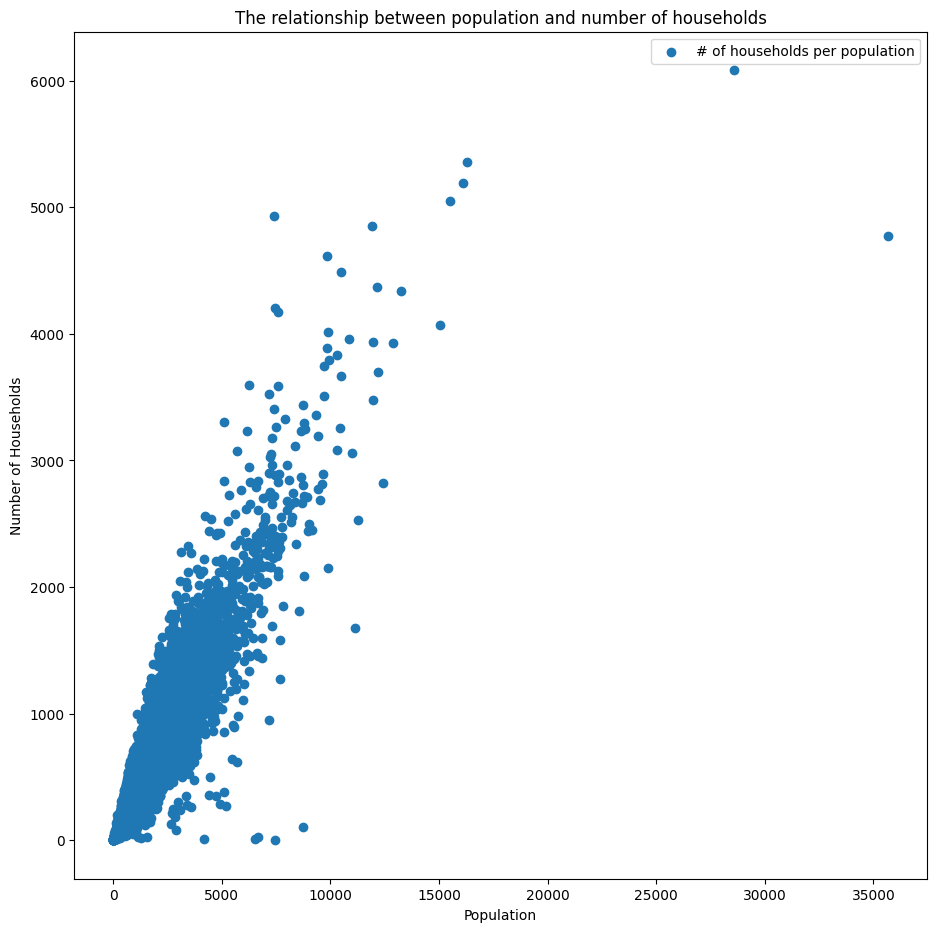

In [169]:
plt.figure(figsize=(11,11))
plt.scatter(home_df['population'], home_df['households'], label = '# of households per population')
plt.title("The relationship between population and number of households")
plt.xlabel("Population")
plt.ylabel("Number of Households")
plt.legend()
plt.show()

#### **2. `Population` and `Median_Income`.**

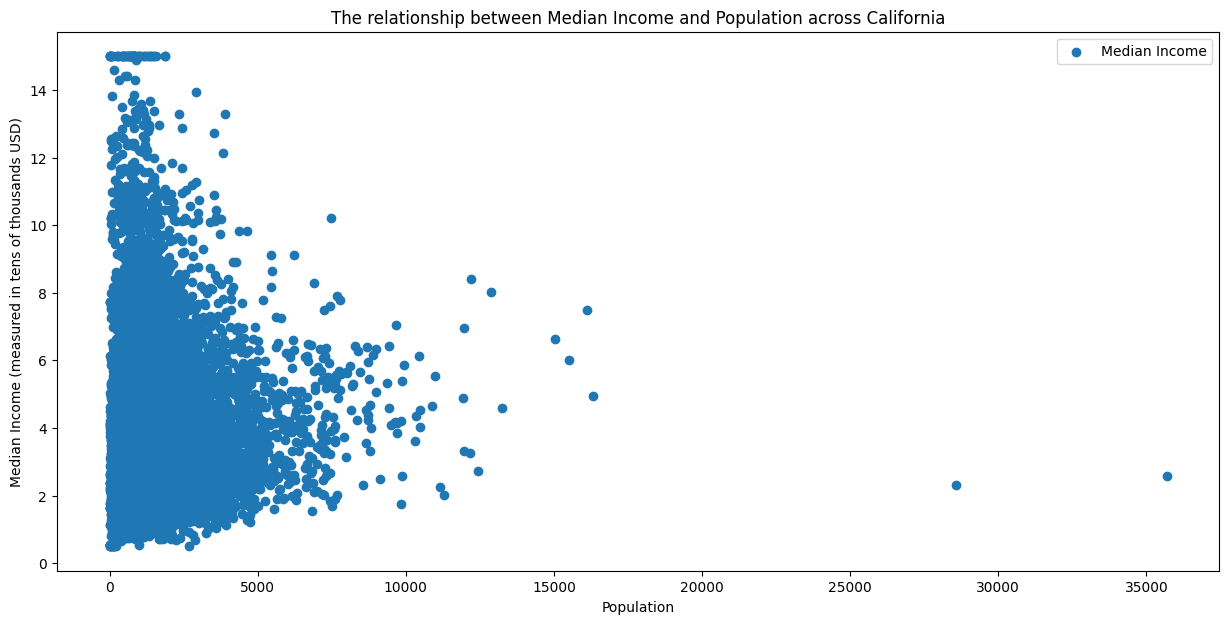

In [170]:
plt.figure(figsize=(15,7))
plt.scatter(home_df['population'], home_df['median_income'], label = 'Median Income')
plt.title("The relationship between Median Income and Population across California")
plt.xlabel("Population")
plt.ylabel("Median Income (measured in tens of thousands USD)")
plt.legend()
plt.show()

#### **3. `Population` and `Median Income` where location = `<1H OCEAN`.**

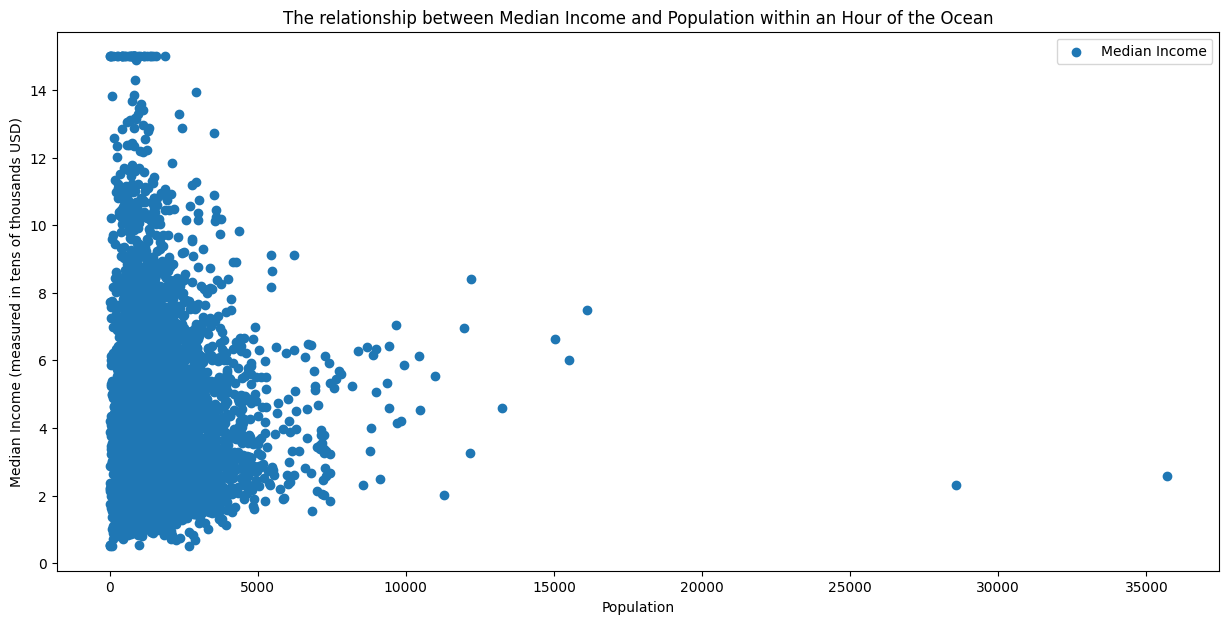

In [171]:
home_df_proximity = home_df.groupby('ocean_proximity')

home_df_near = home_df_proximity.get_group('<1H OCEAN')

plt.figure(figsize=(15,7))
plt.scatter(home_df_near['population'], home_df_near['median_income'], label = 'Median Income')
plt.title("The relationship between Median Income and Population within an Hour of the Ocean")
plt.xlabel("Population")
plt.ylabel("Median Income (measured in tens of thousands USD)")
plt.legend()
plt.show()

#### **4. `Population` and `Median Income` where location = `NEAR BAY`.**

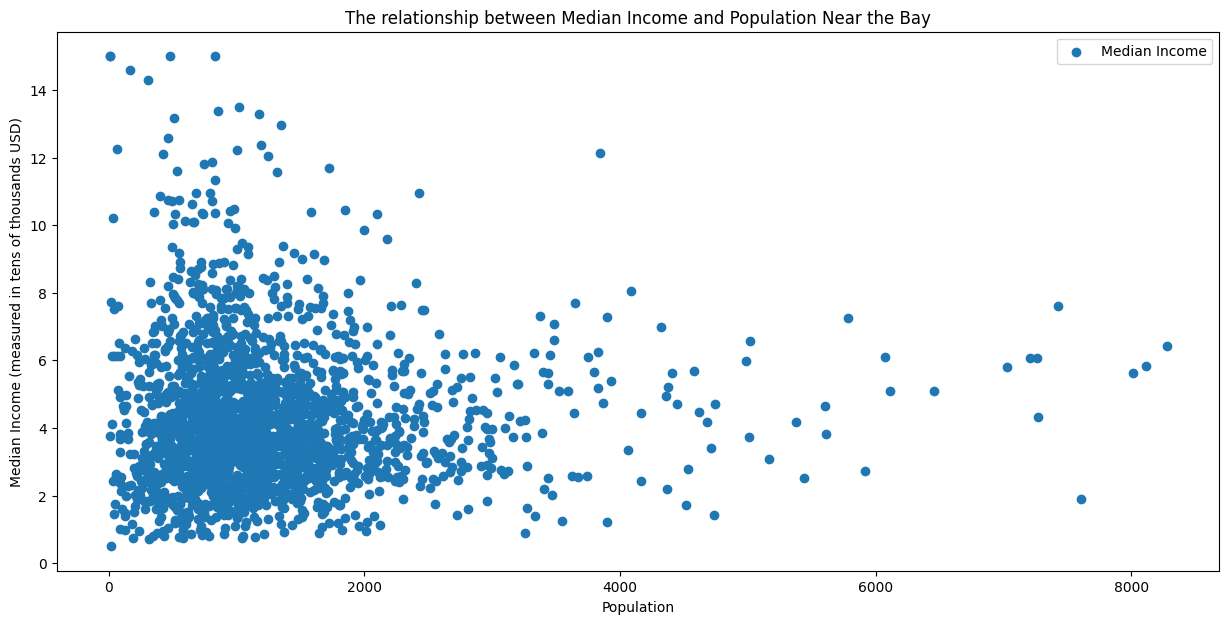

In [172]:
home_df_proximity = home_df.groupby('ocean_proximity')

home_df_near = home_df_proximity.get_group('NEAR BAY')

plt.figure(figsize=(15,7))
plt.scatter(home_df_near['population'], home_df_near['median_income'], label = 'Median Income')
plt.title("The relationship between Median Income and Population Near the Bay")
plt.xlabel("Population")
plt.ylabel("Median Income (measured in tens of thousands USD)")
plt.legend()
plt.show()

#### **5. `Population` and `Median Income` where location = `INLAND`.**

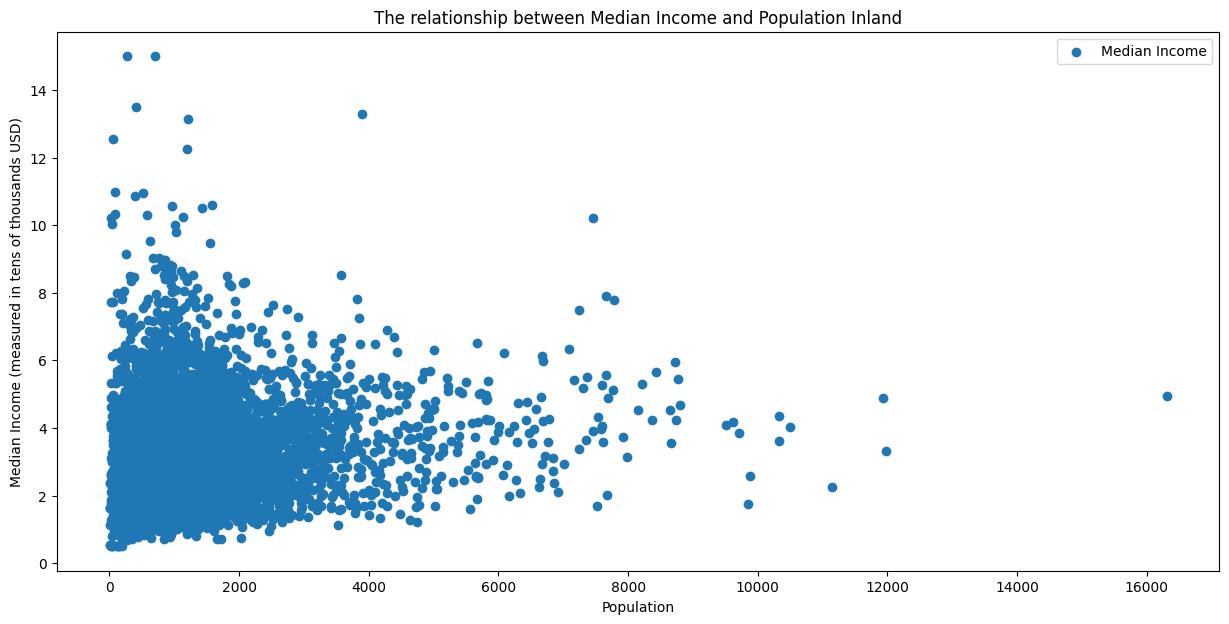

In [173]:
home_df_proximity = home_df.groupby('ocean_proximity')

home_df_near = home_df_proximity.get_group('INLAND')

plt.figure(figsize=(15,7))
plt.scatter(home_df_near['population'], home_df_near['median_income'], label = 'Median Income')
plt.title("The relationship between Median Income and Population Inland")
plt.xlabel("Population")
plt.ylabel("Median Income (measured in tens of thousands USD)")
plt.legend()
plt.show()

#### **6. `Population` and `Median Income` where location = `NEAR OCEAN`.**

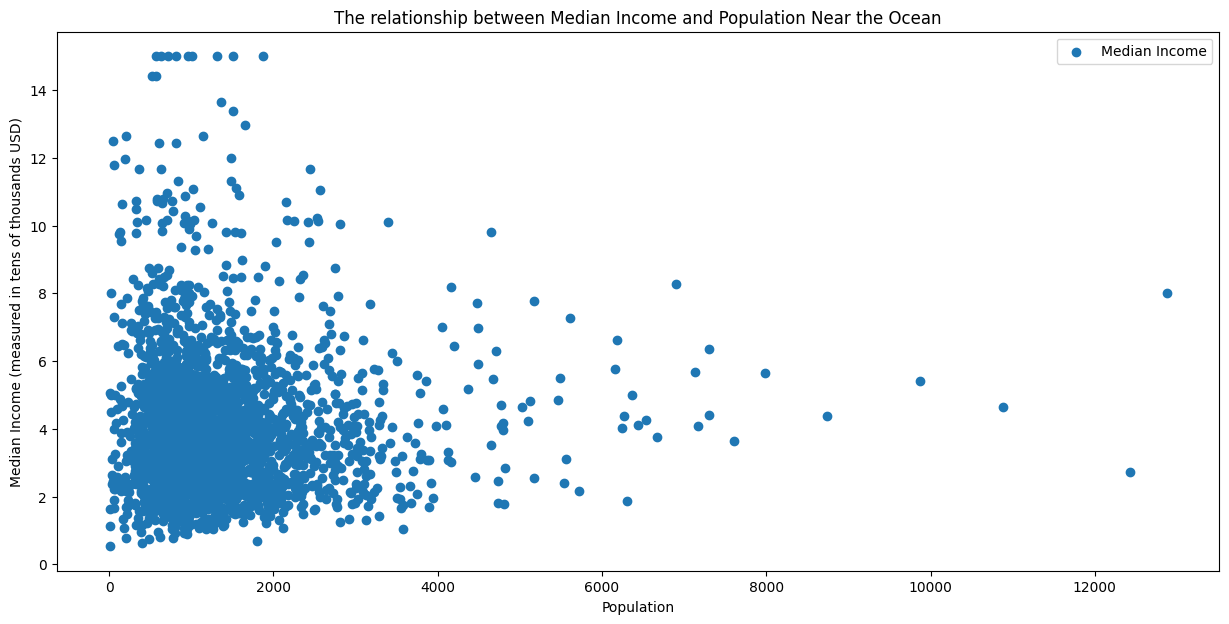

In [174]:
home_df_proximity = home_df.groupby('ocean_proximity')

home_df_near = home_df_proximity.get_group('NEAR OCEAN')

plt.figure(figsize=(15,7))
plt.scatter(home_df_near['population'], home_df_near['median_income'], label = 'Median Income')
plt.title("The relationship between Median Income and Population Near the Ocean")
plt.xlabel("Population")
plt.ylabel("Median Income (measured in tens of thousands USD)")
plt.legend()
plt.show()

#### **7. `Population` and `Median Income` where location = `ISLAND`.**

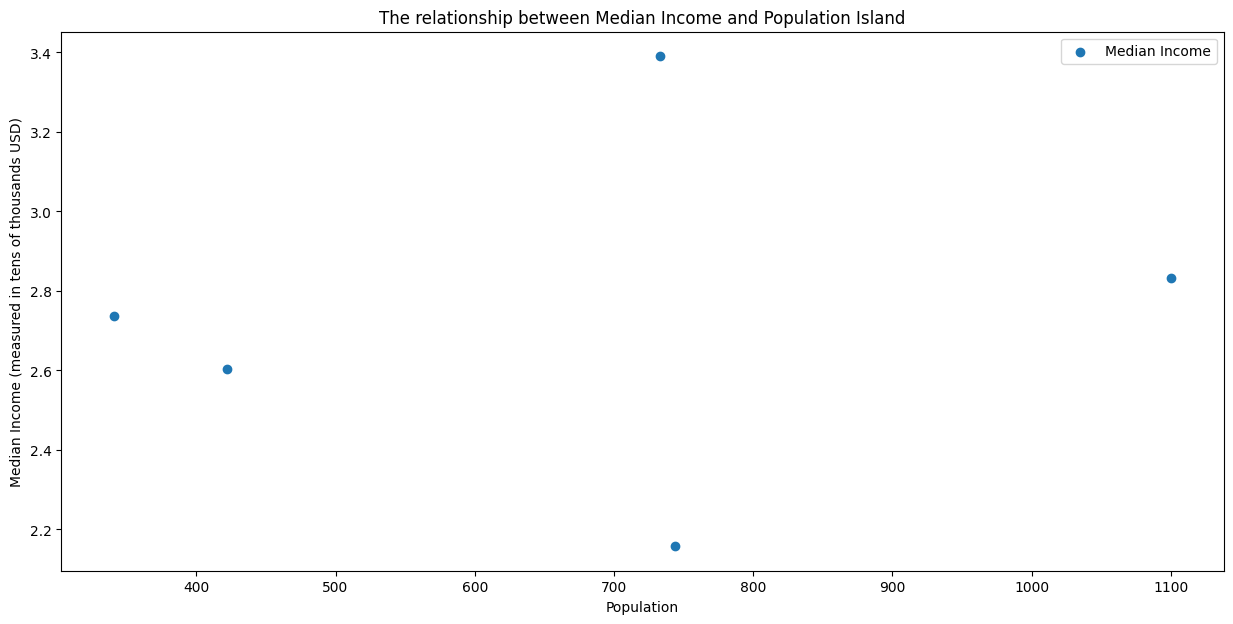

In [175]:
home_df_proximity = home_df.groupby('ocean_proximity')

home_df_near = home_df_proximity.get_group('ISLAND')

plt.figure(figsize=(15,7))
plt.scatter(home_df_near['population'], home_df_near['median_income'], label = 'Median Income')
plt.title("The relationship between Median Income and Population Island")
plt.xlabel("Population")
plt.ylabel("Median Income (measured in tens of thousands USD)")
plt.legend()
plt.show()

### **Step #6**
---

Created a bar graph for each of the locations in the data set (ocean proximity) according to :
* Average `Median House Value`
<br>

#### **1. Calculate the average of each variable by ocean proximity.**

In [176]:
home_df_per_proximity = home_df.groupby('ocean_proximity')

# This prints all the averages for each column according to ocean proximity
print(home_df_per_proximity.mean())

print('\n**************************************************************************************')

# This prints all the averages for each column according to ocean proximity
print("The average median house value (USD) where location =", home_df_per_proximity.mean().index.values[0], ">>",
      home_df_per_proximity.mean().values[0][8])
# This prints all the averages for each column according to ocean proximity
print("The average median house value (USD) where location =", home_df_per_proximity.mean().index.values[1], ">>",
      home_df_per_proximity.mean().values[1][8])
# This prints all the averages for each column according to ocean proximity
print("The average median house value (USD) where location =", home_df_per_proximity.mean().index.values[2], ">>",
      home_df_per_proximity.mean().values[2][8])
# This prints all the averages for each column according to ocean proximity
print("The average median house value (USD) where location =", home_df_per_proximity.mean().index.values[3], ">>",
      home_df_per_proximity.mean().values[3][8])
# This prints all the averages for each column according to ocean proximity
print("The average median house value (USD) where location =", home_df_per_proximity.mean().index.values[4], ">>",
      home_df_per_proximity.mean().values[4][8])

print('\n**************************************************************************************')


                  longitude   latitude  housing_median_age  total_rooms  \
ocean_proximity                                                           
<1H OCEAN       -118.847766  34.560577           29.279225  2628.343586   
INLAND          -119.732990  36.731829           24.271867  2717.742787   
ISLAND          -118.354000  33.358000           42.400000  1574.600000   
NEAR BAY        -122.260694  37.801057           37.730131  2493.589520   
NEAR OCEAN      -119.332555  34.738439           29.347254  2583.700903   

                 total_bedrooms   population  households  median_income  \
ocean_proximity                                                           
<1H OCEAN            540.437281  1520.290499  517.744965       4.230682   
INLAND               529.399328  1391.046252  477.447565       3.208996   
ISLAND               420.400000   668.000000  276.600000       2.744420   
NEAR BAY             509.692140  1230.317467  488.616157       4.172885   
NEAR OCEAN           532

#### **2. Plot these averages.**

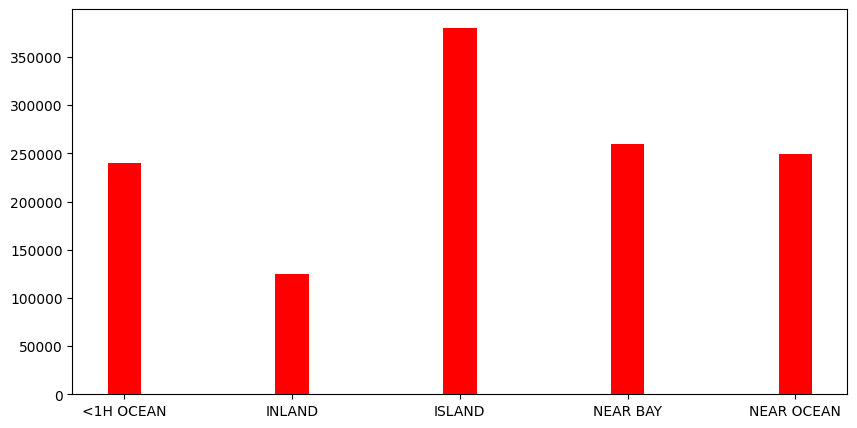

In [177]:
plt.figure(figsize=(10,5))
plt.bar(home_df_per_proximity.mean().index.values[0], home_df_per_proximity.mean().values[0][8], width = 0.2, color = 'red')
plt.bar(home_df_per_proximity.mean().index.values[1], home_df_per_proximity.mean().values[1][8], width = 0.2, color = 'red')
plt.bar(home_df_per_proximity.mean().index.values[2], home_df_per_proximity.mean().values[2][8], width = 0.2, color = 'red')
plt.bar(home_df_per_proximity.mean().index.values[3], home_df_per_proximity.mean().values[3][8], width = 0.2, color = 'red')
plt.bar(home_df_per_proximity.mean().index.values[4], home_df_per_proximity.mean().values[4][8], width = 0.2, color = 'red')
plt.show()

<a name="p2"></a>


## **Part 2: Predicting House Value**
---

I created, evaluated, and trained a machine learning model to predict the average `median house value` of a house based on the provided numerical features.

<br>

Each of the following are included:

**Part 2.1**: Using All Numerical Features and Label Encodings

**Part 2.2**: Using All Numerical Features and Dummy Variable Encodings

**Part 2.3**: Using the 4 Best Numerical Features and the Best Encodings Where Relevant

<br>

<a name="p2.1"></a>


### **Part 2.1: Using All Numerical Features and Label Encodings**
---

#### **Step #1: Load the data**

This was completed in the beginning.

#### **Step #2: Determine the independent and dependent variables**

In [178]:
#needed to drop the predictor and the categorical features
updated_home_df = home_df.drop(['median_house_value', 'ocean_proximity', 'longitude', 'latitude'], axis=1)
X = updated_home_df
y = home_df["median_house_value"]

#### **Step #3: Split data into training and testing data and standardize appropriately**



In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step #4: Import the algorithm**

In [180]:
# import the linear regression algorithm
from sklearn.linear_model import LinearRegression

#### **Step #5:  Initialize the model and set hyperparameters**


In [181]:
model_1 = LinearRegression()
updated_home_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded,median_income_level
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,2
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,2,1
20636,18.0,697.0,150.0,356.0,114.0,2.5568,2,2
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,2,1
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,2,1


#### **Steps #6 - 7: Fit my model, evaluating using 10-Folds Cross Validation and create a visualization if applicable**

1. Fit the model to the training data, determining an average relevant evaluation metric using 10-Folds Cross Validation.
2. Train the final model and visualize the results.

##### **1. Fit the model to the training data, determining an average relevant evaluation metric using 10-Folds Cross Validation.**

In [182]:
model_1.fit(X_train, y_train)
pred = model_1.predict(X_test)

##### **2. Visualize the results.**

###### **Regression Visualization**

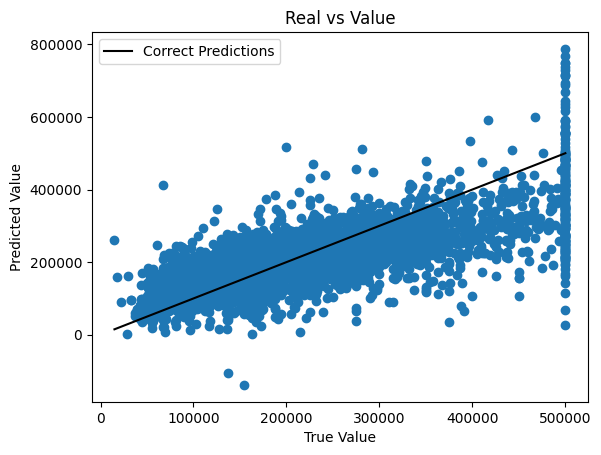

In [183]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

#### **Step #8: Use the model**

##### **1. Predict the median house value of these new houses:**

**Housing 1**

* `housing_median_age`: 49.0
* `total_rooms`: 3500.0
* `total_bedrooms`: 800.0
* `population`: 1500.0
* `households`: 500.0
* `median_income`: 6.0
* `ocean_proximity_encoded`: 0
* `median_income_level`: 3
<br>


**Housing 2**

* `housing_median_age`: 45.0
* `total_rooms`: 3000.0
* `total_bedrooms`: 500.0
* `population`: 1000.0
* `households`: 400.0
* `median_income`: 5.0
* `ocean_proximity_encoded`: 1
* `median_income_level`: 2
<br>


In [184]:
updated_home_df.head(10)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded,median_income_level
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,2
5,52.0,919.0,213.0,413.0,193.0,4.0368,0,2
6,52.0,2535.0,489.0,1094.0,514.0,3.6591,0,2
7,52.0,3104.0,687.0,1157.0,647.0,3.1200,0,2
8,42.0,2555.0,665.0,1206.0,595.0,2.0804,0,2
9,52.0,3549.0,707.0,1551.0,714.0,3.6912,0,2


In [185]:
#stored each house's info in a list
house1 = [49.0, 3500, 800, 1500, 500, 6.0, 0, 3]
house2 = [45.0, 3000, 500, 1000, 400, 5.0, 1, 2]

new_house_data = pd.DataFrame([house1, house2], columns = updated_home_df.columns)

new_pred = model_1.predict(new_house_data)
print('prediction: ', new_pred)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))
print('R2 score: ', r2_score(y_test, pred))

prediction:  [364264.26777093 284819.85187177]
mean squared:  6081902954.393329
R2 score:  0.5358774966150104


##### **2. The cells below look at the coefficients and intercept to determine the modeled relationships, quantitatively.**

In [186]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [187]:
print("Coefficients:")
coefficients.head()

Coefficients:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded,median_income_level
0,1756.020618,-18.689401,101.15386,-35.960779,120.017796,46541.902155,-9175.882607,1679.701231


In [188]:
print("\nIntercept:")
intercept.head()


Intercept:


,Happiness Score
0,-27649.172403


<a name="p2.2"></a>


### **Part 2.2: Using All Numerical Features and Dummy Variable Encodings**
---

#### **Steps #1 - 5:**
1. Load the data
2. Determine the independent and dependent variables.
3. Split data into training and testing data and standardize appropriately
4. Import the algorithm
5. Initialize the model and set hyperparameters

In [189]:
#needed to drop the predictor and the categorical features
updated_home_df = home_df.drop(['median_house_value', 'ocean_proximity', 'longitude', 'latitude'], axis=1)
X = updated_home_df
y = home_df["median_house_value"]

# Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4
# import the linear regression algorithm
from sklearn.linear_model import LinearRegression

# Step 5
model_2 = LinearRegression()


#### **Steps #6 - 7:**
6. Fit the model
7. Evaluate using 10-Folds Cross Validation. Create a visualization if applicable**



In [190]:
model_2.fit(X_train, y_train)
pred = model_2.predict(X_test)

#### **Step #8: Use the model**

##### **1. Predict the life expectancy of these new countries:**

**Housing 1**

* `housing_median_age`: 35.0
* `total_rooms`: 2000.0
* `total_bedrooms`: 400.0
* `population`: 1000.0
* `households`: 700.0
* `median_income`: 4.0
* `ocean_proximity_encoded`: 3
* `median_income_level`: 2
<br>


**Housing 2**

* `housing_median_age`: 60.0
* `total_rooms`: 5000.0
* `total_bedrooms`: 1000.0
* `population`: 3000.0
* `households`: 200.0
* `median_income`: 6.0
* `ocean_proximity_encoded`: 2
* `median_income_level`: 3
<br>


In [191]:
#stored each house's info in a list
house1 = [35.0, 2000, 400, 1000, 700, 4.0, 3, 2]
house2 = [60.0, 5000, 1000, 3000, 200, 6.0, 2, 3]

new_house_data = pd.DataFrame([house1, house2], columns = updated_home_df.columns)

new_pred = model_2.predict(new_house_data)
print('prediction: ', new_pred, '\n')

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))
print('R2 score: ', r2_score(y_test, pred))

prediction:  [244414.05003204 270250.96295478] 

mean squared:  5828683666.196534
R2 score:  0.5559233861504883


##### **2. The cells below look at the coefficients and intercept to determine the modeled relationships, quantitatively.**

In [192]:
coefficients = model_2.coef_
intercept = model_2.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [193]:
print("Coefficients:")
coefficients.head()

Coefficients:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded,median_income_level
0,1750.43217,-18.389086,102.137102,-35.084155,114.699422,46628.648536,-9611.256396,610.573


In [194]:
print("\nIntercept:")
intercept.head()


Intercept:


,Happiness Score
0,-25035.155866


<a name="p2.3"></a>

### **Part 2.3: Using the 4 Best Numerical Features and the Best Encodings Where Relevant**
---

#### **Steps #1-8: Follow the machine learning process.**

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity_encoded  
0       322.0       126.0         8.3252                        0  
1      2401.0      1138.0         8.3014                        0  
2       496.0       177.0         7.2574                        0  
3       558.0       219.0         5.6431                        0  
4       565.0       259.0         3.8462                        0  
mean squared:  5241860555.302042
R2 score:  0.5999828570818597


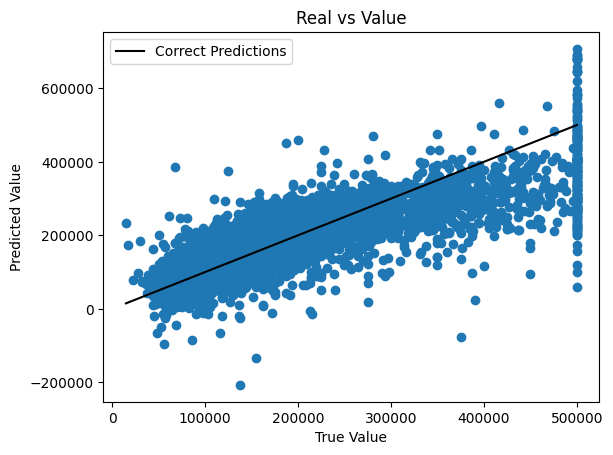

In [195]:
### Build machine learning model here!
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest


features = home_df.select_dtypes('number')
features = features.drop(columns = 'median_house_value')

label = home_df['median_house_value']

feature_selector = SelectKBest(k = 9)
feature_selector.fit_transform(features, label)

best_features = home_df[feature_selector.get_feature_names_out()]

print(best_features.head())

X = best_features
y = home_df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import the linear regression algorithm
from sklearn.linear_model import LinearRegression

model_3 = LinearRegression()

model_3.fit(X_train, y_train)
pred = model_3.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))
print('R2 score: ', r2_score(y_test, pred))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')

plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

<a name="p2w"></a>

### **Part 2: Wrap-up**
---

Summary (Discuss what was learned or discovered while exploring the data):
<br>

In [196]:
#1. Increasing K, increased the accuracy of the model as more features were able to be used to predict with greater accuracy

#2. According to the data, the 3 best variables were total rooms, median income, and ocean proximity encoded (set k=3 and print them).

#3. Best accuracy for the model was about 60% which is ok, but not the greatest. Adding less features decreased the accuracy of the model.

#4. According to the data, on average the highest median house values were located on the islands while the lowest were located inland
